In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/cleaned_ids2018_sampled.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252846 entries, 0 to 1252845
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1252846 non-null  int64  
 1   Dst Port           1252846 non-null  int64  
 2   Protocol           1252846 non-null  int64  
 3   Flow Duration      1252846 non-null  int64  
 4   Tot Fwd Pkts       1252846 non-null  int64  
 5   Tot Bwd Pkts       1252846 non-null  int64  
 6   TotLen Fwd Pkts    1252846 non-null  int64  
 7   TotLen Bwd Pkts    1252846 non-null  int64  
 8   Fwd Pkt Len Max    1252846 non-null  int64  
 9   Fwd Pkt Len Min    1252846 non-null  int64  
 10  Fwd Pkt Len Mean   1252846 non-null  float64
 11  Fwd Pkt Len Std    1252846 non-null  float64
 12  Bwd Pkt Len Max    1252846 non-null  int64  
 13  Bwd Pkt Len Min    1252846 non-null  int64  
 14  Bwd Pkt Len Mean   1252846 non-null  float64
 15  Bwd Pkt Len Std    1252846 non-n

In [ ]:
df1=df.loc[df['Label'] == 1]
df1=df1.head(250000)
df4=df.loc[df['Label'] == 4]
df4=df4.head(250000)
df5=df.loc[df['Label'] == 5]
df5=df5.head(100000)
df2=df.loc[df['Label'] == 2]
df3=df.loc[df['Label'] == 3]
df6=df.loc[df['Label'] == 6]
df7=df.loc[df['Label'] == 7]
df8=df.loc[df['Label'] == 8]
df9=df.loc[df['Label'] == 9]
df10=df.loc[df['Label'] == 10]
df11=df.loc[df['Label'] == 11]

In [ ]:
merge = [
    df1, 
    df2,
    df3,
    df4,
    df5,
    df6, 
    df7
]
df = pd.concat(merge)
del merge
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531329 entries, 0 to 1252199
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         531329 non-null  int64  
 1   Dst Port           531329 non-null  int64  
 2   Protocol           531329 non-null  int64  
 3   Flow Duration      531329 non-null  int64  
 4   Tot Fwd Pkts       531329 non-null  int64  
 5   Tot Bwd Pkts       531329 non-null  int64  
 6   TotLen Fwd Pkts    531329 non-null  int64  
 7   TotLen Bwd Pkts    531329 non-null  int64  
 8   Fwd Pkt Len Max    531329 non-null  int64  
 9   Fwd Pkt Len Min    531329 non-null  int64  
 10  Fwd Pkt Len Mean   531329 non-null  float64
 11  Fwd Pkt Len Std    531329 non-null  float64
 12  Bwd Pkt Len Max    531329 non-null  int64  
 13  Bwd Pkt Len Min    531329 non-null  int64  
 14  Bwd Pkt Len Mean   531329 non-null  float64
 15  Bwd Pkt Len Std    531329 non-null  float64
 16  F

In [ ]:
df=df.reset_index()

In [ ]:
df

,index,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,146275,3389,6,5206015,9,11,1213,1948,661,0,134.777778,209.079995,1173,0,177.090909,347.937194,607.182269,3.841710,2.740008e+05,4.873823e+05,1906221,54,5206015,650751.9,1.367797e+06,4024698,186,5043065,5.043065e+05,5.916400e+05,1906221,46378,0,0,0,0,192,244,1.728770,2.112941,0,1173,150.523810,282.220768,79648.561905,0,0,1,1,0,0,0,1,158.05000,134.77777,177.09091,0,0,0,0,0,0,9,1213,11,1948,8192,62872,6,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,1
1,1,512109,443,6,60991608,14,14,1211,3396,875,0,86.500000,235.073066,1460,0,242.571429,520.660485,75.534982,0.459080,2.258948e+06,4.218116e+06,10009249,1,60991608,4691662.0,5.173112e+06,10077768,265,60922977,4.686383e+06,5.195334e+06,10080219,1,0,0,0,0,292,364,0.229540,0.229540,0,1460,158.862069,398.172318,158541.194581,0,0,0,1,0,0,0,0,164.53572,86.50000,242.57143,0,0,0,0,0,0,14,1211,14,3396,8192,117,9,20,1.165047e+05,1.174018e+05,356150,68519,1.000239e+07,1.665183e+04,10009249,9968397,1
2,2,807703,53,17,27292,1,1,45,163,45,45,45.000000,0.000000,163,163,163.000000,0.000000,7621.280961,73.281548,2.729200e+04,0.000000e+00,27292,27292,0,0.0,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,8,8,36.640774,36.640774,45,163,84.333333,68.127332,4641.333333,0,0,0,0,0,0,0,0,126.50000,45.00000,163.00000,0,0,0,0,0,0,1,45,1,163,-1,-1,0,8,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,1
3,3,491912,443,6,70343424,17,20,1118,5653,258,0,65.764706,88.989837,1430,0,282.650000,445.753682,96.256332,0.525991,1.953984e+06,9.874980e+06,58654921,8,70343424,4396464.0,1.474216e+07,58790474,142,70195940,3.694523e+06,1.354913e+07,58750691,13,0,0,0,0,352,412,0.241671,0.284319,0,1430,178.184211,343.542661,118021.559744,0,0,0,1,0,0,0,0,183.00000,65.76471,282.65000,0,0,0,0,0,0,17,1118,20,5653,8192,184,9,20,5.276835e+05,3.863115e+05,800847,254520,3.457024e+07,3.406089e+07,58654921,10485549,1
4,4,858679,53,17,137267,2,2,94,214,47,47,47.000000,0.000000,107,107,107.000000,0.000000,2243.802225,29.140289,4.575567e+04,4.240885e+04,84190,259,137008,137008.0,0.000000e+00,137008,137008,84449,8.444900e+04,0.000000e+00,84449,84449,0,0,0,0,16,16,14.570144,14.570144,47,107,71.000000,32.863353,1080.000000,0,0,0,0,0,0,0,0,88.75000,47.00000,107.00000,0,0,0,0,0,0,2,94,2,214,-1,-1,1,8,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531324,1250030,30587,80,6,99999918,2,2,16,0,8,8,8.000000,0.000000,0,0,0.000000,0.000000,0.160000,0.040000,3.333331e+07,5.773497e+07,99999902,2,99999916,99999920.0,0.000000e+00,99999916,99999916,99999904,9.999990e+07,0.000000e+00,99999904,99999904,1,0,0,0,64,64,0.020000,0.020000

In [ ]:
import numpy as np
dfnew=df
# dfnew['Label'] = np.where(dfnew['Label'] > 1, 0, dfnew['Label'])


In [ ]:
dfnew

,index,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,146275,3389,6,5206015,9,11,1213,1948,661,0,134.777778,209.079995,1173,0,177.090909,347.937194,607.182269,3.841710,2.740008e+05,4.873823e+05,1906221,54,5206015,650751.9,1.367797e+06,4024698,186,5043065,5.043065e+05,5.916400e+05,1906221,46378,0,0,0,0,192,244,1.728770,2.112941,0,1173,150.523810,282.220768,79648.561905,0,0,1,1,0,0,0,1,158.05000,134.77777,177.09091,0,0,0,0,0,0,9,1213,11,1948,8192,62872,6,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0
1,1,512109,443,6,60991608,14,14,1211,3396,875,0,86.500000,235.073066,1460,0,242.571429,520.660485,75.534982,0.459080,2.258948e+06,4.218116e+06,10009249,1,60991608,4691662.0,5.173112e+06,10077768,265,60922977,4.686383e+06,5.195334e+06,10080219,1,0,0,0,0,292,364,0.229540,0.229540,0,1460,158.862069,398.172318,158541.194581,0,0,0,1,0,0,0,0,164.53572,86.50000,242.57143,0,0,0,0,0,0,14,1211,14,3396,8192,117,9,20,1.165047e+05,1.174018e+05,356150,68519,1.000239e+07,1.665183e+04,10009249,9968397,0
2,2,807703,53,17,27292,1,1,45,163,45,45,45.000000,0.000000,163,163,163.000000,0.000000,7621.280961,73.281548,2.729200e+04,0.000000e+00,27292,27292,0,0.0,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,8,8,36.640774,36.640774,45,163,84.333333,68.127332,4641.333333,0,0,0,0,0,0,0,0,126.50000,45.00000,163.00000,0,0,0,0,0,0,1,45,1,163,-1,-1,0,8,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0
3,3,491912,443,6,70343424,17,20,1118,5653,258,0,65.764706,88.989837,1430,0,282.650000,445.753682,96.256332,0.525991,1.953984e+06,9.874980e+06,58654921,8,70343424,4396464.0,1.474216e+07,58790474,142,70195940,3.694523e+06,1.354913e+07,58750691,13,0,0,0,0,352,412,0.241671,0.284319,0,1430,178.184211,343.542661,118021.559744,0,0,0,1,0,0,0,0,183.00000,65.76471,282.65000,0,0,0,0,0,0,17,1118,20,5653,8192,184,9,20,5.276835e+05,3.863115e+05,800847,254520,3.457024e+07,3.406089e+07,58654921,10485549,0
4,4,858679,53,17,137267,2,2,94,214,47,47,47.000000,0.000000,107,107,107.000000,0.000000,2243.802225,29.140289,4.575567e+04,4.240885e+04,84190,259,137008,137008.0,0.000000e+00,137008,137008,84449,8.444900e+04,0.000000e+00,84449,84449,0,0,0,0,16,16,14.570144,14.570144,47,107,71.000000,32.863353,1080.000000,0,0,0,0,0,0,0,0,88.75000,47.00000,107.00000,0,0,0,0,0,0,2,94,2,214,-1,-1,1,8,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531324,1250030,30587,80,6,99999918,2,2,16,0,8,8,8.000000,0.000000,0,0,0.000000,0.000000,0.160000,0.040000,3.333331e+07,5.773497e+07,99999902,2,99999916,99999920.0,0.000000e+00,99999916,99999916,99999904,9.999990e+07,0.000000e+00,99999904,99999904,1,0,0,0,64,64,0.020000,0.020000

In [ ]:
data_X=df.drop(['Label','Unnamed: 0','index'],axis=1)
data_y_trans=df['Label']

In [ ]:
data_X

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3389,6,5206015,9,11,1213,1948,661,0,134.777778,209.079995,1173,0,177.090909,347.937194,607.182269,3.841710,2.740008e+05,4.873823e+05,1906221,54,5206015,650751.9,1.367797e+06,4024698,186,5043065,5.043065e+05,5.916400e+05,1906221,46378,0,0,0,0,192,244,1.728770,2.112941,0,1173,150.523810,282.220768,79648.561905,0,0,1,1,0,0,0,1,158.05000,134.77777,177.09091,0,0,0,0,0,0,9,1213,11,1948,8192,62872,6,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0
1,443,6,60991608,14,14,1211,3396,875,0,86.500000,235.073066,1460,0,242.571429,520.660485,75.534982,0.459080,2.258948e+06,4.218116e+06,10009249,1,60991608,4691662.0,5.173112e+06,10077768,265,60922977,4.686383e+06,5.195334e+06,10080219,1,0,0,0,0,292,364,0.229540,0.229540,0,1460,158.862069,398.172318,158541.194581,0,0,0,1,0,0,0,0,164.53572,86.50000,242.57143,0,0,0,0,0,0,14,1211,14,3396,8192,117,9,20,1.165047e+05,1.174018e+05,356150,68519,1.000239e+07,1.665183e+04,10009249,9968397
2,53,17,27292,1,1,45,163,45,45,45.000000,0.000000,163,163,163.000000,0.000000,7621.280961,73.281548,2.729200e+04,0.000000e+00,27292,27292,0,0.0,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,8,8,36.640774,36.640774,45,163,84.333333,68.127332,4641.333333,0,0,0,0,0,0,0,0,126.50000,45.00000,163.00000,0,0,0,0,0,0,1,45,1,163,-1,-1,0,8,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0
3,443,6,70343424,17,20,1118,5653,258,0,65.764706,88.989837,1430,0,282.650000,445.753682,96.256332,0.525991,1.953984e+06,9.874980e+06,58654921,8,70343424,4396464.0,1.474216e+07,58790474,142,70195940,3.694523e+06,1.354913e+07,58750691,13,0,0,0,0,352,412,0.241671,0.284319,0,1430,178.184211,343.542661,118021.559744,0,0,0,1,0,0,0,0,183.00000,65.76471,282.65000,0,0,0,0,0,0,17,1118,20,5653,8192,184,9,20,5.276835e+05,3.863115e+05,800847,254520,3.457024e+07,3.406089e+07,58654921,10485549
4,53,17,137267,2,2,94,214,47,47,47.000000,0.000000,107,107,107.000000,0.000000,2243.802225,29.140289,4.575567e+04,4.240885e+04,84190,259,137008,137008.0,0.000000e+00,137008,137008,84449,8.444900e+04,0.000000e+00,84449,84449,0,0,0,0,16,16,14.570144,14.570144,47,107,71.000000,32.863353,1080.000000,0,0,0,0,0,0,0,0,88.75000,47.00000,107.00000,0,0,0,0,0,0,2,94,2,214,-1,-1,1,8,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531324,80,6,99999918,2,2,16,0,8,8,8.000000,0.000000,0,0,0.000000,0.000000,0.160000,0.040000,3.333331e+07,5.773497e+07,99999902,2,99999916,99999920.0,0.000000e+00,99999916,99999916,99999904,9.999990e+07,0.000000e+00,99999904,99999904,1,0,0,0,64,64,0.020000,0.020000,0,8,4.800000,4.381780,19.200000,0,1,0,0,1,0,0,0,6.00000,8.00000,0.00000,0,0,0,0,0,0,2,16,2,0,211,219,1,

In [ ]:
data_y_trans

0         1
1         1
2         1
3         1
4         1
         ..
531324    0
531325    0
531326    0
531327    0
531328    0
Name: Label, Length: 531329, dtype: int64

#FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest 
from sklearn.ensemble import ExtraTreesClassifier

#selecting 20 best features
# select_best= SelectKBest(chi2, k=20)
# X_feat_20 = select_best.fit_transform(data_X, data_y_trans)
# X_feat_20.shape

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [ ]:
model.feature_importances_

array([8.96858621e-02, 1.92499851e-02, 1.72006178e-02, 5.92156936e-03,
       7.13979655e-03, 5.34618682e-03, 4.01865561e-03, 1.11183201e-02,
       1.86384436e-03, 6.38420381e-03, 7.32875698e-03, 2.39268396e-02,
       2.38083399e-03, 1.55229710e-02, 1.56207689e-02, 2.18309172e-03,
       3.54079896e-02, 9.05489590e-03, 4.82884176e-03, 1.04269307e-02,
       8.61745154e-03, 1.33909873e-02, 6.84754813e-03, 3.35720588e-03,
       9.35949908e-03, 6.58020753e-03, 3.18832219e-03, 1.62269038e-03,
       1.66195499e-03, 2.51805687e-03, 1.17383953e-03, 5.18348798e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.09195145e-02,
       7.34064333e-03, 2.98216198e-02, 2.90933492e-02, 8.47691157e-04,
       1.41106065e-02, 5.58559825e-03, 8.95623960e-03, 6.35740363e-03,
       4.41595592e-04, 3.73006101e-03, 2.81178135e-02, 2.88876579e-02,
       5.92616366e-02, 2.58110306e-02, 0.00000000e+00, 2.30455558e-02,
       8.35424263e-03, 2.83101037e-03, 1.29046198e-02, 0.00000000e+00,
      

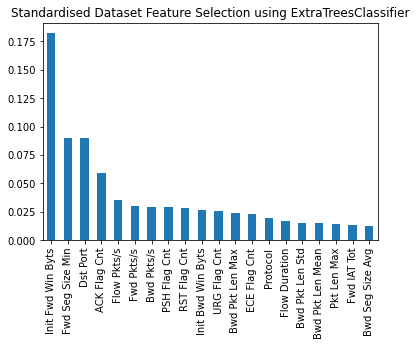

In [ ]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [ ]:
data_new_20features_X=data_X[['Init Fwd Win Byts','Dst Port','Fwd Seg Size Min','ACK Flag Cnt','Flow Pkts/s','Bwd Pkts/s','Init Bwd Win Byts','Fwd Pkts/s','RST Flag Cnt','PSH Flag Cnt','ECE Flag Cnt','URG Flag Cnt','Bwd Seg Size Avg','Bwd Pkt Len Max','Bwd Pkt Len Std','Fwd IAT Min','Protocol','Pkt Len Max','Fwd Pkt Len Max','Flow Duration']]

In [ ]:
data_new_20features_X

,Init Fwd Win Byts,Dst Port,Fwd Seg Size Min,ACK Flag Cnt,Flow Pkts/s,Bwd Pkts/s,Init Bwd Win Byts,Fwd Pkts/s,RST Flag Cnt,PSH Flag Cnt,ECE Flag Cnt,URG Flag Cnt,Bwd Seg Size Avg,Bwd Pkt Len Max,Bwd Pkt Len Std,Fwd IAT Min,Protocol,Pkt Len Max,Fwd Pkt Len Max,Flow Duration
0,8192,3389,20,0,3.841710,2.112941,62872,1.728770,1,1,1,0,177.09091,1173,347.937194,186,6,1173,661,5206015
1,8192,443,20,0,0.459080,0.229540,117,0.229540,0,1,0,0,242.57143,1460,520.660485,265,6,1460,875,60991608
2,-1,53,8,0,73.281548,36.640774,-1,36.640774,0,0,0,0,163.00000,163,0.000000,0,17,163,45,27292
3,8192,443,20,0,0.525991,0.284319,184,0.241671,0,1,0,0,282.65000,1430,445.753682,142,6,1430,258,70343424
4,-1,53,8,0,29.140289,14.570144,-1,14.570144,0,0,0,0,107.00000,107,0.000000,137008,17,107,47,137267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531324,211,80,32,1,0.040000,0.020000,219,0.020000,0,0,0,0,0.00000,0,0.000000,99999916,6,8,8,99999918
531325,26883,80,32,0,0.167930,0.027988,0,0.139941,0,1,0,0,0.00000,0,0.000000,175,6,230,230,107187709
531326,26883,80,32,0,0.157925,0.027869,0,0.130056,0,1,0,0,0.00000,0,0.000000,153,6,230,230,107646209
531327,26883,80,32,0,0.158680,0.028002,0,0.130677,0,1,0,0,0.00000,0,0.000000,237,6,230,230,107133998


#Train Test Split Normal dataset 84 Features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)

In [ ]:
X_train.shape

(371930, 77)

In [ ]:
X_test.shape

(159399, 77)

#SMOTE FOR UNBALANCED DATASET

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train.astype('float'), y_train.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()

NameError: ignored

In [ ]:
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

NameError: ignored

In [ ]:
X_train.shape

#Standardization of 77 feature dataset

In [ ]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

#Train Test Split 20 Feature Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

Standarization of 20 feature datset

In [ ]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

In [ ]:
X_train_std_20.shape

(371930, 20)

In [ ]:
y_train_20.shape

(371930,)

In [ ]:
X_test_std_20.shape

(159399, 20)

In [ ]:
y_test_20.shape

(159399,)

#Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std_20, y_train_20)

RandomForestClassifier()

In [ ]:
rf_y_pred = rf.predict(X_test_std_20)

In [ ]:
rf_y_pred

array([5, 1, 5, ..., 2, 4, 4])

In [ ]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



=== Classification Report ===
              precision    recall  f1-score   support

           1       0.97      1.00      0.99     75167
           2       1.00      1.00      1.00     11500
           3       1.00      1.00      1.00     11230
           4       1.00      1.00      1.00     41049
           5       1.00      0.97      0.98     17266
           6       1.00      0.64      0.78      2511
           7       1.00      0.13      0.22       676

    accuracy                           0.99    159399
   macro avg       1.00      0.82      0.85    159399
weighted avg       0.99      0.99      0.99    159399





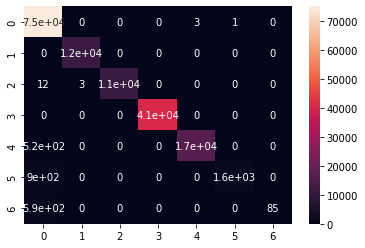

In [ ]:
cm1=confusion_matrix(y_test_20, rf_y_pred)
import seaborn as sns
sns.heatmap(cm1, annot=True)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test_20, rf_y_pred))
print('\n')

In [ ]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 98.72646628899805


In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
X_test_std_20.shape
y_test_20.shape

(159399,)

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(X_train_std_20, y_train_20)

DecisionTreeClassifier()

In [ ]:
dt_y_pred = dt.predict(X_test_std_20)

In [ ]:
dt_conf_mat = confusion_matrix(y_test_20, dt_y_pred)
print("Decision Tree Confusion: \n", dt_conf_mat)

Decision Tree Confusion: 
 [[75162     0     0     0     1     1     3]
 [    0 11500     0     0     0     0     0]
 [ 5610  5620     0     0     0     0     0]
 [   15     0     0 41034     0     0     0]
 [   14     0     0     0 17252     0     0]
 [    0     0     0     0     0  2509     2]
 [    6     0     0     0     0     9   661]]


In [ ]:
acc_score_dt = accuracy_score(y_test_20, dt_y_pred)
print("Accuracy Score for Decision Tree: \n", acc_score_dt*100)

Accuracy Score for Decision Tree: 
 92.92279123457487


In [ ]:
print("=== Classification Report ===")
print(classification_report(y_test_20, rf_y_pred))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           1       0.97      1.00      0.99     75167
           2       1.00      1.00      1.00     11500
           3       1.00      1.00      1.00     11230
           4       1.00      1.00      1.00     41049
           5       1.00      0.97      0.98     17266
           6       1.00      0.64      0.78      2511
           7       1.00      0.13      0.22       676

    accuracy                           0.99    159399
   macro avg       1.00      0.82      0.85    159399
weighted avg       0.99      0.99      0.99    159399





#SVM Classifier

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC(multi_class = 'ovr')
svm.fit(X_train_std_20, y_train_20)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
y_pred_svm = svm.predict(X_test_std_20)
svm.score(X_test_std_20, y_test_20)

0.9823210936078646

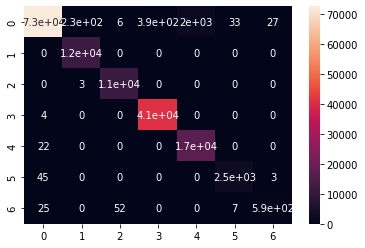

In [ ]:
svm_conf_mat = confusion_matrix(y_test_20, y_pred_svm)
import seaborn as sns
sns.heatmap(svm_conf_mat, annot=True)

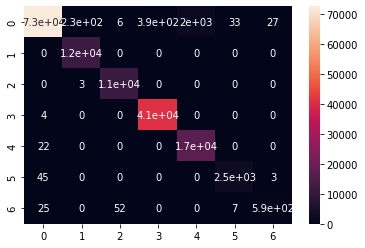

In [ ]:
sns.heatmap(svm_conf_mat, annot=True)

In [ ]:
acc_score_svm = accuracy_score(y_test_20, y_pred_svm)
print("Accuracy Score for SVM: \n", acc_score_svm*100)

Accuracy Score for SVM: 
 98.2308546477707


#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_std_20, y_train_20)
gnb_y_pred = gnb.predict(X_test_std_20)

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_20, gnb_y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test_20, gnb_y_pred))
print('\n')
acc_score_svm = accuracy_score(y_test_20, gnb_y_pred)
print("Accuracy Score for Naive: \n", acc_score_svm*100)

=== Confusion Matrix ===
[[68275     0     0     0  6892     0     0]
 [11500     0     0     0     0     0     0]
 [11230     0     0     0     0     0     0]
 [14489     0     0     0 26560     0     0]
 [  296     0     0     0 16970     0     0]
 [ 2511     0     0     0     0     0     0]
 [  676     0     0     0     0     0     0]]


=== Classification Report ===


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.63      0.91      0.74     75167
           2       0.00      0.00      0.00     11500
           3       0.00      0.00      0.00     11230
           4       0.00      0.00      0.00     41049
           5       0.34      0.98      0.50     17266
           6       0.00      0.00      0.00      2511
           7       0.00      0.00      0.00       676

    accuracy                           0.53    159399
   macro avg       0.14      0.27      0.18    159399
weighted avg       0.33      0.53      0.40    159399



Accuracy Score for Naive: 
 53.47900551446371


#LSTM

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [ ]:
y_train_lstm_20 = np.array(y_train_20)
y_test_lstm_20 = np.array(y_test_20)

y_train_onehot_lstm = to_categorical(y_train_lstm_20)
y_test_one_hot_lstm = to_categorical(y_test_lstm_20)

X_train_lstm_20 = np.array(X_train_std_20)
X_test_lstm_20 = np.array(X_test_std_20)

In [ ]:
X_test_std_20

array([[-0.54317858,  0.09464678, -0.10828698, ...,  0.01375863,
         0.55436523, -0.30548612],
       [ 2.07032009, -0.38778397, -0.10828698, ..., -0.69194592,
        -0.64440427, -0.29636898],
       [-0.54317858,  0.09464678, -0.10828698, ...,  0.01375863,
         0.55436523, -0.30553535],
       ...,
       [ 0.34094847, -0.41457514,  2.39611462, ..., -0.69194592,
        -0.64440427, -0.30590742],
       [ 0.61790336, -0.41084713, -0.10828698, ..., -0.69194592,
        -0.64440427, -0.30582446],
       [ 0.61790336, -0.41084713, -0.10828698, ..., -0.69194592,
        -0.64440427, -0.3054882 ]])

In [ ]:
X_train_lstm_20.shape[0]

371930

In [ ]:

X_train_lstm_reshape = np.reshape(X_train_std_20, (X_train_lstm_20.shape[0], 1,  X_train_lstm_20.shape[1]))
X_test_lstm_reshape = np.reshape(X_test_std_20, (X_test_lstm_20.shape[0], 1, X_test_lstm_20.shape[1]))

In [ ]:
from keras.models import Sequential
batch_size = 1000

# Initialize the network
model_LSTM = Sequential()
model_LSTM.add(LSTM(8,input_dim=20, return_sequences=True)) 
model_LSTM.add(Dropout(0.1))
model_LSTM.add(LSTM(8,input_dim=20, return_sequences=False))
model_LSTM.add(Dropout(0.1))
model_LSTM.add(Dense(8))
model_LSTM.add(Activation('softmax'))

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)


In [ ]:
model_LSTM.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_LSTM.fit(X_train_lstm_reshape, y_train_onehot_lstm, validation_data=(X_test_lstm_reshape, y_test_one_hot_lstm),batch_size=batch_size, epochs=50,callbacks=[monitor])

Epoch 1/50
372/372 [==============================] - 6s 8ms/step - loss: 1.3718 - accuracy: 0.5686 - val_loss: 0.7828 - val_accuracy: 0.7577
Epoch 2/50
372/372 [==============================] - 2s 5ms/step - loss: 0.5769 - accuracy: 0.8427 - val_loss: 0.3570 - val_accuracy: 0.9368
Epoch 3/50
372/372 [==============================] - 2s 5ms/step - loss: 0.3151 - accuracy: 0.9240 - val_loss: 0.1880 - val_accuracy: 0.9722
Epoch 4/50
372/372 [==============================] - 2s 5ms/step - loss: 0.1961 - accuracy: 0.9492 - val_loss: 0.1107 - val_accuracy: 0.9746
Epoch 5/50
372/372 [==============================] - 2s 5ms/step - loss: 0.1369 - accuracy: 0.9677 - val_loss: 0.0683 - val_accuracy: 0.9901
Epoch 6/50
372/372 [==============================] - 2s 5ms/step - loss: 0.1011 - accuracy: 0.9804 - val_loss: 0.0504 - val_accuracy: 0.9910
Epoch 7/50
372/372 [==============================] - 2s 5ms/step - loss: 0.0816 - accuracy: 0.9844 - val_loss: 0.0411 - val_accuracy: 0.9911
Epoch 

In [ ]:
%tensorflow_version 2.6

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.6`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
y_perd_lstm = model_LSTM.predict(X_test_lstm_reshape)
y_perd_lstm=np.argmax(y_perd_lstm,axis=1)

In [ ]:
lstm_conf_mat = confusion_matrix(y_test_lstm_20, y_perd_lstm)
print("LSTM Confusion: \n", lstm_conf_mat)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_lstm_20, y_perd_lstm))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test_lstm_20, y_perd_lstm))
print('\n')
acc_score_svm = accuracy_score(y_test_lstm_20, y_perd_lstm)
print("Accuracy Score for LSTM: \n", acc_score_svm*100)

LSTM Confusion: 
 [[75081     2     3     2    42     8    29]
 [    0 11500     0     0     0     0     0]
 [    0     3 11226     0     1     0     0]
 [    0     0     0 41049     0     0     0]
 [   17     0     0     0 17249     0     0]
 [    0     0     0     0     0  2506     5]
 [    9     0     7     0     0     6   654]]
=== Confusion Matrix ===
[[75081     2     3     2    42     8    29]
 [    0 11500     0     0     0     0     0]
 [    0     3 11226     0     1     0     0]
 [    0     0     0 41049     0     0     0]
 [   17     0     0     0 17249     0     0]
 [    0     0     0     0     0  2506     5]
 [    9     0     7     0     0     6   654]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     75167
           2       1.00      1.00      1.00     11500
           3       1.00      1.00      1.00     11230
           4       1.00      1.00      1.00     41049
           5       1.0

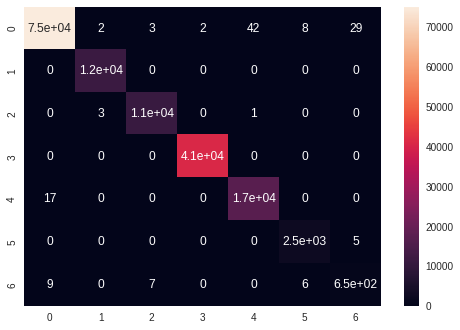

In [ ]:
import seaborn as sns
sns.heatmap(lstm_conf_mat, annot=True)

#XG-Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:

# fit model no training data
gradinet_boost = GradientBoostingClassifier()
gradinet_boost.fit(X_train_std_20, y_train_20)

GradientBoostingClassifier()

In [ ]:
# Predict the labels 
y_pred_xgboost = gradinet_boost.predict(X_test_std_20)
print(y_pred_xgboost)

[1 1 1 ... 2 4 4]


In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_20, y_pred_xgboost))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test_20, y_pred_xgboost))
print('\n')
acc_score_xg = accuracy_score(y_test_20, y_pred_xgboost)
print("Accuracy Score for Xg Boost: \n", acc_score_xg*100)

=== Confusion Matrix ===
[[75140    24     1     0     0     1     1]
 [    0 11500     0     0     0     0     0]
 [   13     3 11214     0     0     0     0]
 [   15     0     0 41034     0     0     0]
 [17028     0     0     0   238     0     0]
 [    4     0     0     0     0  2507     0]
 [  213     0     0     0     0     4   459]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.81      1.00      0.90     75167
           2       1.00      1.00      1.00     11500
           3       1.00      1.00      1.00     11230
           4       1.00      1.00      1.00     41049
           5       1.00      0.01      0.03     17266
           6       1.00      1.00      1.00      2511
           7       1.00      0.68      0.81       676

    accuracy                           0.89    159399
   macro avg       0.97      0.81      0.82    159399
weighted avg       0.91      0.89      0.84    159399



Accuracy Score for Xg Boost:

#Ensemble Method of Machine Learning

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# ADABOOST 
adaboost = AdaBoostClassifier(base_estimator= dt, n_estimators=100)

In [ ]:
adaboost.fit(X_train_std_20, y_train_20)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [ ]:
y_pred_adaboost = adaboost.predict(X_test_std_20)

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_20, y_pred_adaboost))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test_20, y_pred_adaboost))
print('\n')
acc_score_ad = accuracy_score(y_test_20, y_pred_adaboost)
print("Accuracy Score for Xg Boost: \n", acc_score_ad*100)

=== Confusion Matrix ===
[[75167     0     0     0     0     0     0]
 [    0 11500     0     0     0     0     0]
 [   23     3 11204     0     0     0     0]
 [ 2269     0     0 38780     0     0     0]
 [   14     0     0     0 17252     0     0]
 [  839     0     0     0     0  1672     0]
 [  222     0     0     0     0     0   454]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.96      1.00      0.98     75167
           2       1.00      1.00      1.00     11500
           3       1.00      1.00      1.00     11230
           4       1.00      0.94      0.97     41049
           5       1.00      1.00      1.00     17266
           6       1.00      0.67      0.80      2511
           7       1.00      0.67      0.80       676

    accuracy                           0.98    159399
   macro avg       0.99      0.90      0.94    159399
weighted avg       0.98      0.98      0.98    159399



Accuracy Score for Xg Boost:

#ROC Curves and Classification Report

##Random Forest


0.9910476226325133


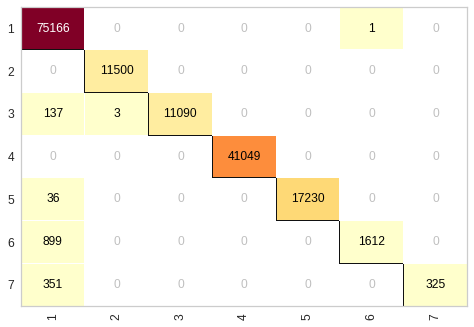

In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport


from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf, classes=[1,2,3,4,5,6,7])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_std_20, y_train_20)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
print(cm.score(X_test_std_20, y_test_20))



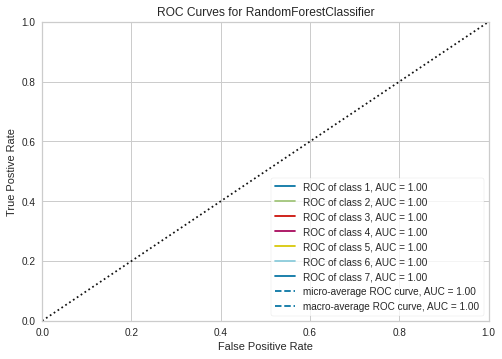

In [ ]:
roc_auc(rf, X_train_std_20, y_train_20, X_test=X_test_std_20, y_test=y_test_20, classes=['1','2','3','4','5','6','7'])

0.9548805199530738


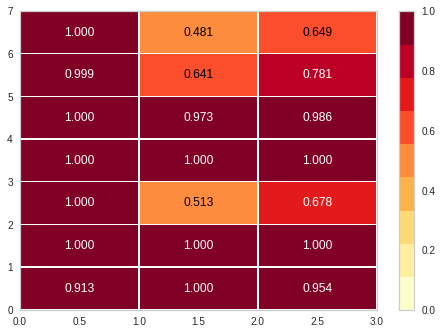

In [ ]:

visualizer = ClassificationReport(rf)
visualizer.fit(X_train_std_20, y_train_20)        # Fit the visualizer and the model
print(visualizer.score(X_test_std_20, y_test_20))

##Decision Tree

0.9280484821109292


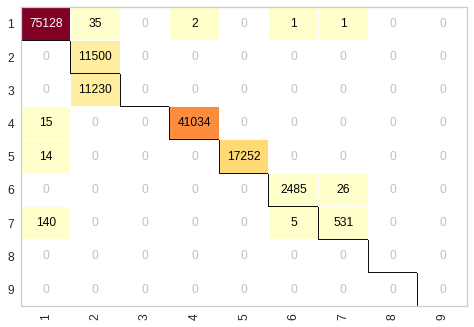

In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport


from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(dt, classes=[1,2,3,4,5,6,7])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_std_20, y_train_20)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
print(cm.score(X_test_std_20, y_test_20))



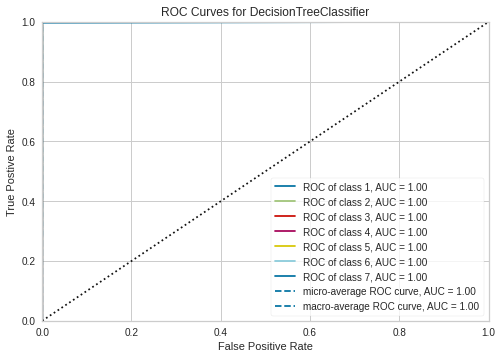

In [ ]:
roc_auc(dt, X_train_std_20, y_train_20, X_test=X_test_std_20, y_test=y_test_20, classes=['1','2','3','4','5','6','7'])

0.9284437167108953


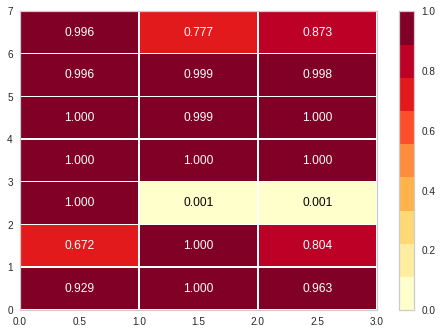

In [ ]:
visualizer = ClassificationReport(dt)
visualizer.fit(X_train_std_20, y_train_20)        # Fit the visualizer and the model
print(visualizer.score(X_test_std_20, y_test_20))

##SVM Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conv

0.9823273671729433


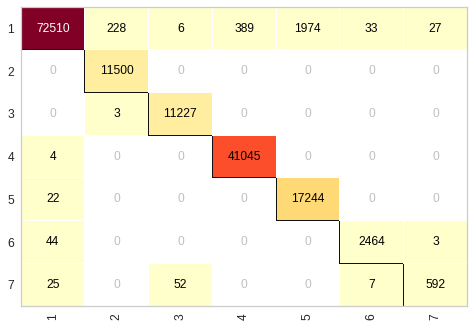

In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport


from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm, classes=[1,2,3,4,5,6,7])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_std_20, y_train_20)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
print(cm.score(X_test_std_20, y_test_20))



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


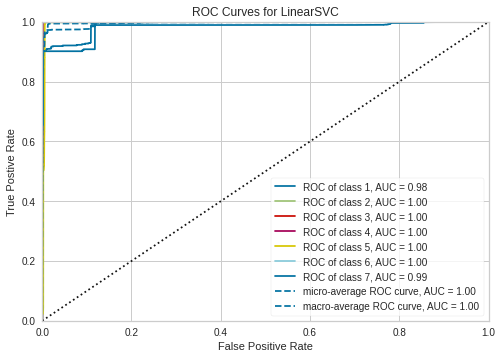

In [ ]:
roc_auc(svm, X_train_std_20, y_train_20, X_test=X_test_std_20, y_test=y_test_20, classes=['1','2','3','4','5','6','7'])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9283872546251859


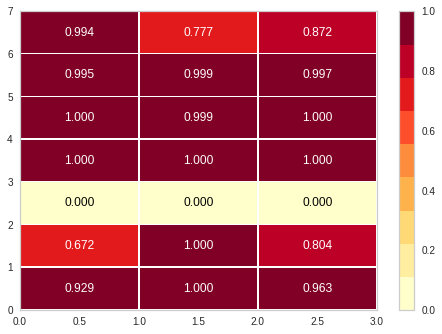

In [ ]:
visualizer = ClassificationReport(dt)
visualizer.fit(X_train_std_20, y_train_20)        # Fit the visualizer and the model
print(visualizer.score(X_test_std_20, y_test_20))

##Xg-Boost

0.886341821466885


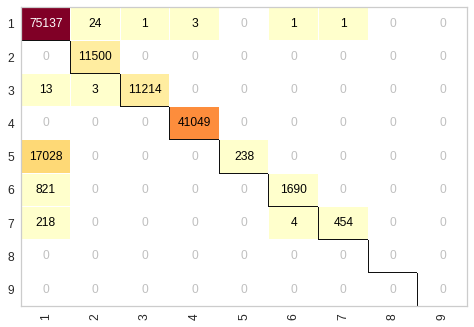

In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport


from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(gradinet_boost, classes=[1,2,3,4,5,6,7])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_std_20, y_train_20)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
print(cm.score(X_test_std_20, y_test_20))



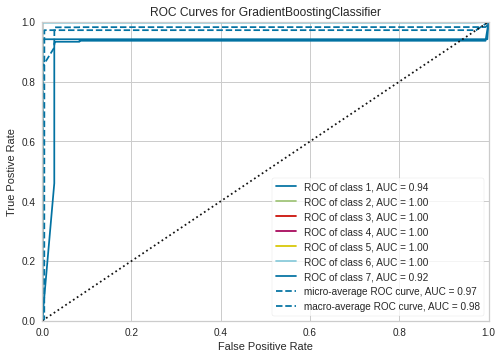

In [ ]:
roc_auc(gradinet_boost, X_train_std_20, y_train_20, X_test=X_test_std_20, y_test=y_test_20, classes=['1','2','3','4','5','6','7'])

0.886341821466885


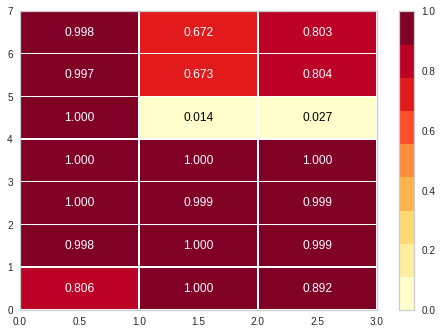

In [ ]:
visualizer = ClassificationReport(gradinet_boost)
visualizer.fit(X_train_std_20, y_train_20)        # Fit the visualizer and the model
print(visualizer.score(X_test_std_20, y_test_20))

##Ensemble Learning

0.8560279550059913


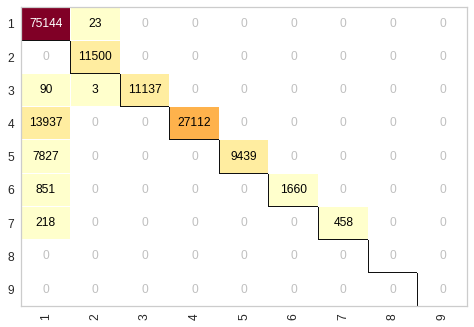

In [ ]:

from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport


from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(adaboost, classes=[1,2,3,4,5,6,7,8,9])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_std_20, y_train_20)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
print(cm.score(X_test_std_20, y_test_20))



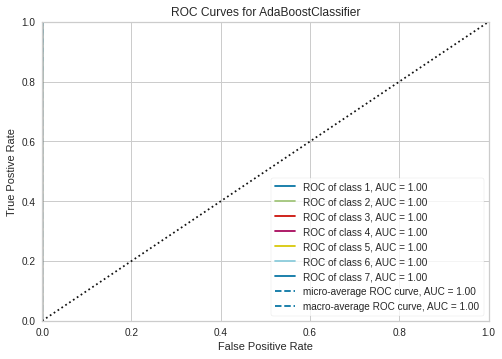

In [ ]:
roc_auc(adaboost, X_train_std_20, y_train_20, X_test=X_test_std_20, y_test=y_test_20, classes=['1','2','3','4','5','6','7'])

0.7679157334738612


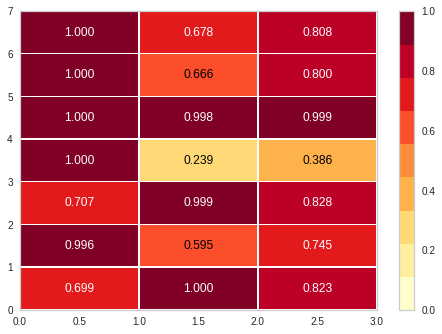

In [ ]:
visualizer = ClassificationReport(adaboost)
visualizer.fit(X_train_std_20, y_train_20)        # Fit the visualizer and the model
print(visualizer.score(X_test_std_20, y_test_20))

#Incremental Learning

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split as ttsplit
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error as mse


In [ ]:
X_train, X_test, y_train, y_test = ttsplit(data_new_20features_X, data_y_trans, test_size=0.1, random_state=0)
X_train_1, X_train_2, y_train_1, y_train_2 = ttsplit(X_train, 
                                                     y_train, 
                                                     test_size=0.5,
                                                     random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std = ss_20.fit_transform(X_train)
X_test_std = ss_20.fit_transform(X_test)
X_train_std_1 = ss_20.fit_transform(X_train_1)
X_train_std_2 = ss_20.fit_transform(X_train_2)


In [ ]:
xg_train_0 = xgb.DMatrix(X_train_std, label=y_train)
xg_train_1 = xgb.DMatrix(X_train_std_1, label=y_train_1)
xg_train_2 = xgb.DMatrix(X_train_std_2, label=y_train_2)
xg_test = xgb.DMatrix(X_test_std, label=y_test)

In [ ]:
params.update({'process_type': 'update',
               'updater'     : 'refresh',
               'refresh_leaf': True})
model_2_v2_update = xgb.train(params, xg_train_2, 30, xgb_model=model_1)

[19:17:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:17:16] WARNING: /workspace/src/learner.cc:194: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.


In [ ]:
print('full train\t',mse(model_0.predict(xg_test), y_test)) # benchmark
print('model 1 \t',mse(model_1.predict(xg_test), y_test))  
print('model 2 \t',mse(model_2_v1.predict(xg_test), y_test))  # "before"
print('model 1+2\t',mse(model_2_v2.predict(xg_test), y_test))  # "after"
print('model 1+update2\t',mse(model_2_v2_update.predict(xg_test), y_test))  # "after"

full train	 3.16559949628021
model 1 	 3.5731495846571253
model 2 	 3.710485564213075
model 1+2	 3.236043521067903
model 1+update2	 4.351926805740499


In [ ]:
xg_train_1 = xgb.DMatrix(X_train_std_1, label=y_train_1)
xg_train_2 = xgb.DMatrix(X_train_std_2, label=y_train_2)
xg_test = xgb.DMatrix(X_test_std, label=y_test)

params = {'objective': 'reg:linear', 'verbose': False}
model_1 = xgb.train(params, xg_train_1, 30)
model_1.save_model('model_1.model')

[06:28:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
model_2_v1 = xgb.train(params, xg_train_2, 30)
model_2_v2 = xgb.train(params, xg_train_2, 30, xgb_model='model_1.model')

e1=mse(model_1.predict(xg_test), y_test)     # benchmark
e2=mse(model_2_v1.predict(xg_test), y_test)  # "before"
e3=mse(model_2_v2.predict(xg_test), y_test)  # "after"


[07:15:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


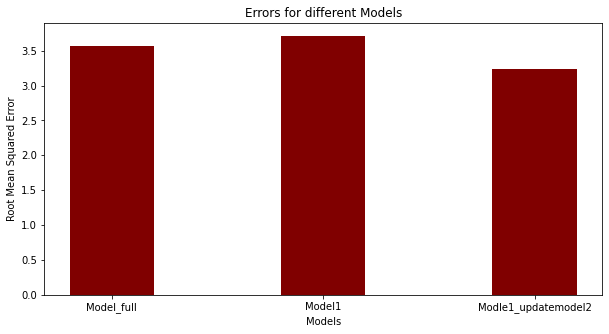

In [ ]:
data = {'Model_full':e1, 'Model1':e2, 'Modle1_updatemodel2':e3}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Root Mean Squared Error")
plt.title("Errors for different Models")
plt.show()

##Using River

In [ ]:
pip install river

     |████████████████████████████████| 2.5 MB 5.0 MB/s 


In [ ]:
from river import compose
from river import linear_model
from river import metrics
from river import preprocessing
model=compose.Pipeline(
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression()
)
metric=metric.Accuracy()


#Autoencoder 
###dfnew dataset (line18)

In [ ]:
import numpy as np
dfnew=df
dfnew['Label'] = np.where(dfnew['Label'] > 1, 0, dfnew['Label'])

dfnew=dfnew.head(257000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dfnew['Label'] = (dfnew['Label']+1)%2
dfnew['Label']

0         0
1         0
2         0
3         0
4         0
         ..
531324    1
531325    1
531326    1
531327    1
531328    1
Name: Label, Length: 531329, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Attack"]

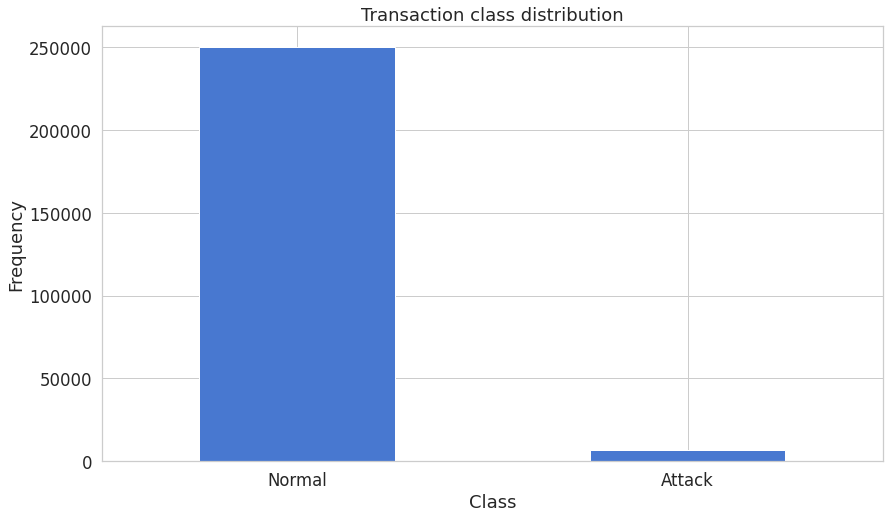

In [ ]:
count_classes = pd.value_counts(dfnew['Label'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
df=dfnew
df

,index,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,146275,3389,6,5206015,9,11,1213,1948,661,0,134.777778,209.079995,1173,0,177.090909,347.937194,607.182269,3.841710,2.740008e+05,4.873823e+05,1906221,54,5206015,650751.9,1.367797e+06,4024698,186,5043065,5.043065e+05,5.916400e+05,1906221,46378,0,0,0,0,192,244,1.728770,2.112941,0,1173,150.523810,282.220768,79648.561905,0,0,1,1,0,0,0,1,158.05000,134.77777,177.09091,0,0,0,0,0,0,9,1213,11,1948,8192,62872,6,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0
1,1,512109,443,6,60991608,14,14,1211,3396,875,0,86.500000,235.073066,1460,0,242.571429,520.660485,75.534982,0.459080,2.258948e+06,4.218116e+06,10009249,1,60991608,4691662.0,5.173112e+06,10077768,265,60922977,4.686383e+06,5.195334e+06,10080219,1,0,0,0,0,292,364,0.229540,0.229540,0,1460,158.862069,398.172318,158541.194581,0,0,0,1,0,0,0,0,164.53572,86.50000,242.57143,0,0,0,0,0,0,14,1211,14,3396,8192,117,9,20,1.165047e+05,1.174018e+05,356150,68519,1.000239e+07,1.665183e+04,10009249,9968397,0
2,2,807703,53,17,27292,1,1,45,163,45,45,45.000000,0.000000,163,163,163.000000,0.000000,7621.280961,73.281548,2.729200e+04,0.000000e+00,27292,27292,0,0.0,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,8,8,36.640774,36.640774,45,163,84.333333,68.127332,4641.333333,0,0,0,0,0,0,0,0,126.50000,45.00000,163.00000,0,0,0,0,0,0,1,45,1,163,-1,-1,0,8,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0
3,3,491912,443,6,70343424,17,20,1118,5653,258,0,65.764706,88.989837,1430,0,282.650000,445.753682,96.256332,0.525991,1.953984e+06,9.874980e+06,58654921,8,70343424,4396464.0,1.474216e+07,58790474,142,70195940,3.694523e+06,1.354913e+07,58750691,13,0,0,0,0,352,412,0.241671,0.284319,0,1430,178.184211,343.542661,118021.559744,0,0,0,1,0,0,0,0,183.00000,65.76471,282.65000,0,0,0,0,0,0,17,1118,20,5653,8192,184,9,20,5.276835e+05,3.863115e+05,800847,254520,3.457024e+07,3.406089e+07,58654921,10485549,0
4,4,858679,53,17,137267,2,2,94,214,47,47,47.000000,0.000000,107,107,107.000000,0.000000,2243.802225,29.140289,4.575567e+04,4.240885e+04,84190,259,137008,137008.0,0.000000e+00,137008,137008,84449,8.444900e+04,0.000000e+00,84449,84449,0,0,0,0,16,16,14.570144,14.570144,47,107,71.000000,32.863353,1080.000000,0,0,0,0,0,0,0,0,88.75000,47.00000,107.00000,0,0,0,0,0,0,2,94,2,214,-1,-1,1,8,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531324,1250030,30587,80,6,99999918,2,2,16,0,8,8,8.000000,0.000000,0,0,0.000000,0.000000,0.160000,0.040000,3.333331e+07,5.773497e+07,99999902,2,99999916,99999920.0,0.000000e+00,99999916,99999916,99999904,9.999990e+07,0.000000e+00,99999904,99999904,1,0,0,0,64,64,0.020000,0.020000

In [ ]:
data = df.drop(['index','Unnamed: 0'], axis=1)
data=data[['Init Fwd Win Byts','Dst Port','Fwd Seg Size Min','ACK Flag Cnt','Flow Pkts/s','Bwd Pkts/s','Init Bwd Win Byts','Fwd Pkts/s','RST Flag Cnt','PSH Flag Cnt','ECE Flag Cnt','URG Flag Cnt','Bwd Seg Size Avg','Bwd Pkt Len Max','Bwd Pkt Len Std','Fwd IAT Min','Protocol','Pkt Len Max','Fwd Pkt Len Max','Flow Duration','Label']]

In [ ]:
data.head()

,Init Fwd Win Byts,Dst Port,Fwd Seg Size Min,ACK Flag Cnt,Flow Pkts/s,Bwd Pkts/s,Init Bwd Win Byts,Fwd Pkts/s,RST Flag Cnt,PSH Flag Cnt,ECE Flag Cnt,URG Flag Cnt,Bwd Seg Size Avg,Bwd Pkt Len Max,Bwd Pkt Len Std,Fwd IAT Min,Protocol,Pkt Len Max,Fwd Pkt Len Max,Flow Duration,Label
0,8192,3389,20,0,3.841710,2.112941,62872,1.728770,1,1,1,0,177.09091,1173,347.937194,186,6,1173,661,5206015,0
1,8192,443,20,0,0.459080,0.229540,117,0.229540,0,1,0,0,242.57143,1460,520.660485,265,6,1460,875,60991608,0
2,-1,53,8,0,73.281548,36.640774,-1,36.640774,0,0,0,0,163.00000,163,0.000000,0,17,163,45,27292,0
3,8192,443,20,0,0.525991,0.284319,184,0.241671,0,1,0,0,282.65000,1430,445.753682,142,6,1430,258,70343424,0
4,-1,53,8,0,29.140289,14.570144,-1,14.570144,0,0,0,0,107.00000,107,0.000000,137008,17,107,47,137267,0


In [ ]:
X_train, X_test = train_test_split(data, test_size=0.3, random_state=RANDOM_SEED)

X_train1 = X_train[X_train.Label == 0]

X_train1 = X_train1.drop(['Label'], axis=1)
X_train = X_train.drop(['Label'], axis=1)
y_test = X_test['Label']

X_test = X_test.drop(['Label'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X_train1 =scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [ ]:
nb_epoch = 25
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train1, X_train1,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/25
5469/5469 [==============================] - 14s 2ms/step - loss: 0.4056 - accuracy: 0.8089 - val_loss: 0.7123 - val_accuracy: 0.9132
Epoch 2/25
5469/5469 [==============================] - 13s 2ms/step - loss: 0.3156 - accuracy: 0.9524 - val_loss: 0.5932 - val_accuracy: 0.9286
Epoch 3/25
5469/5469 [==============================] - 13s 2ms/step - loss: 0.2767 - accuracy: 0.9506 - val_loss: 0.4885 - val_accuracy: 0.8941
Epoch 4/25
5469/5469 [==============================] - 12s 2ms/step - loss: 0.2569 - accuracy: 0.9527 - val_loss: 0.3820 - val_accuracy: 0.9527
Epoch 5/25
5469/5469 [==============================] - 12s 2ms/step - loss: 0.2503 - accuracy: 0.9567 - val_loss: 0.3180 - val_accuracy: 0.9632
Epoch 6/25
5469/5469 [==============================] - 12s 2ms/step - loss: 0.2444 - accuracy: 0.9601 - val_loss: 0.2833 - val_accuracy: 0.9718
Epoch 7/25
5469/5469 [==============================] - 12s 2ms/step - loss: 0.2398 - accuracy: 0.9609 - val_loss: 0.2575 - val_ac

In [ ]:
autoencoder = load_model('model.h5')

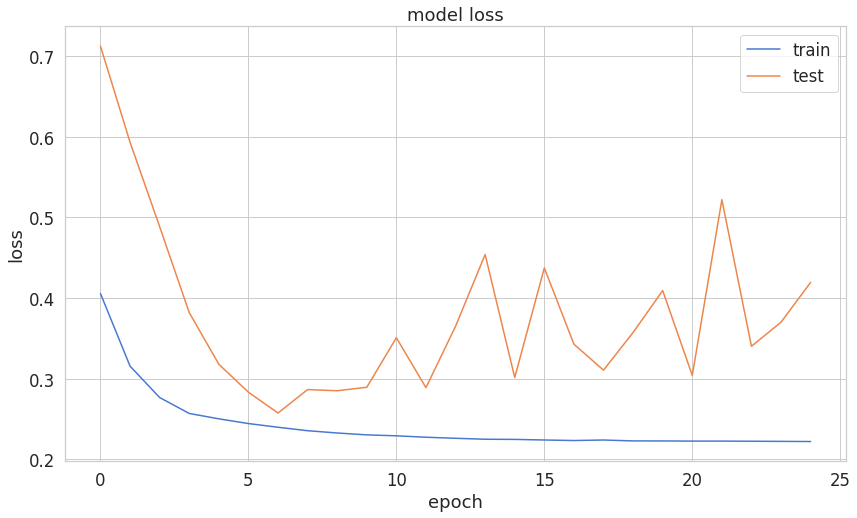

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [ ]:
predictions = autoencoder.predict(X_test)

In [ ]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [ ]:
error_df.describe()

,reconstruction_error,true_class
count,77100.000000,77100.000000
mean,0.256792,0.026978
std,0.695836,0.162020
min,0.054282,0.000000
25%,0.105626,0.000000
50%,0.249908,0.000000
75%,0.308045,0.000000
max,36.729834,1.000000


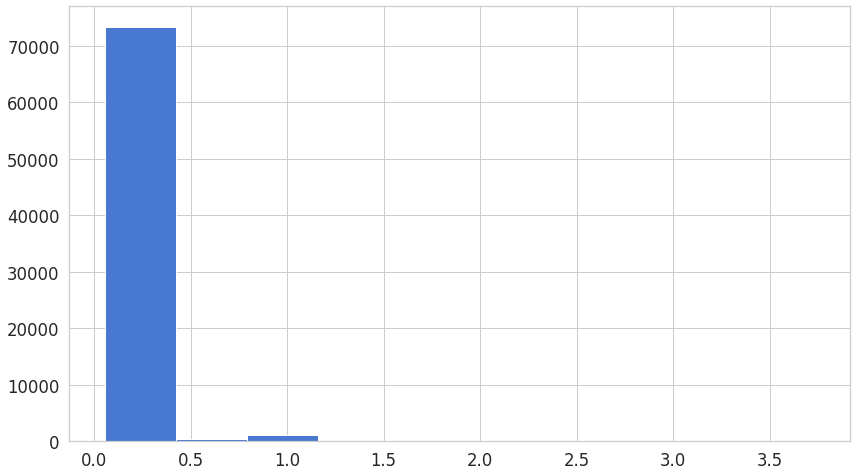

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

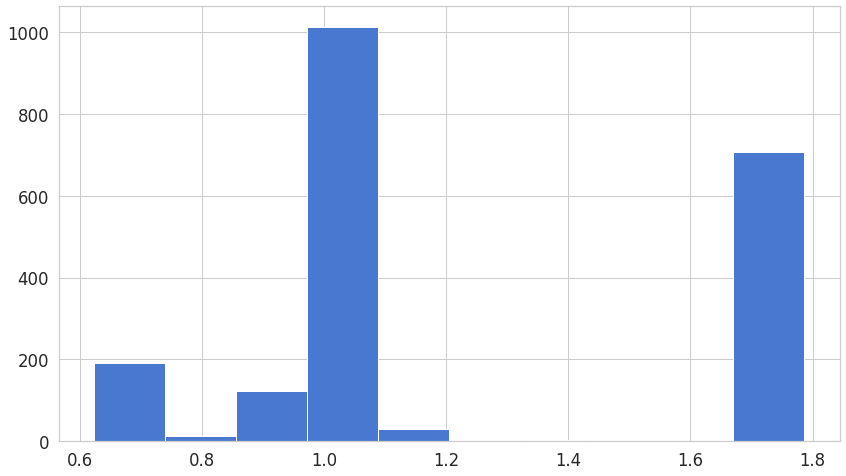

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [ ]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

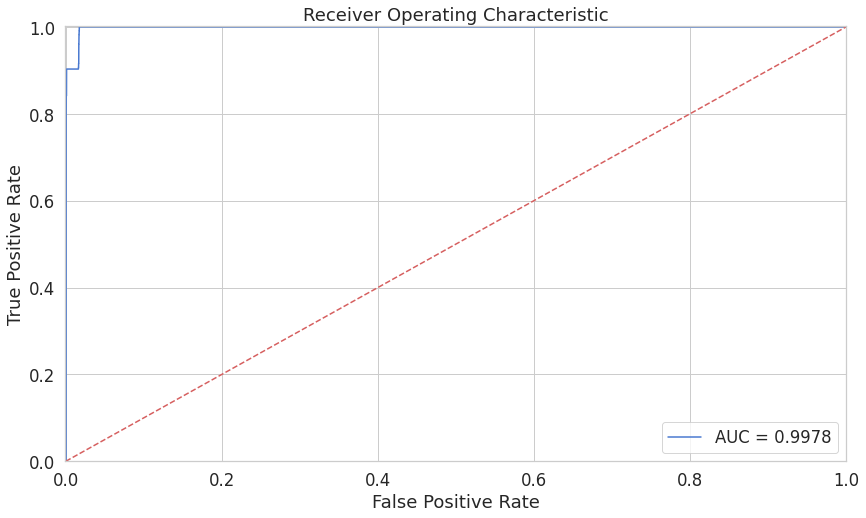

In [ ]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

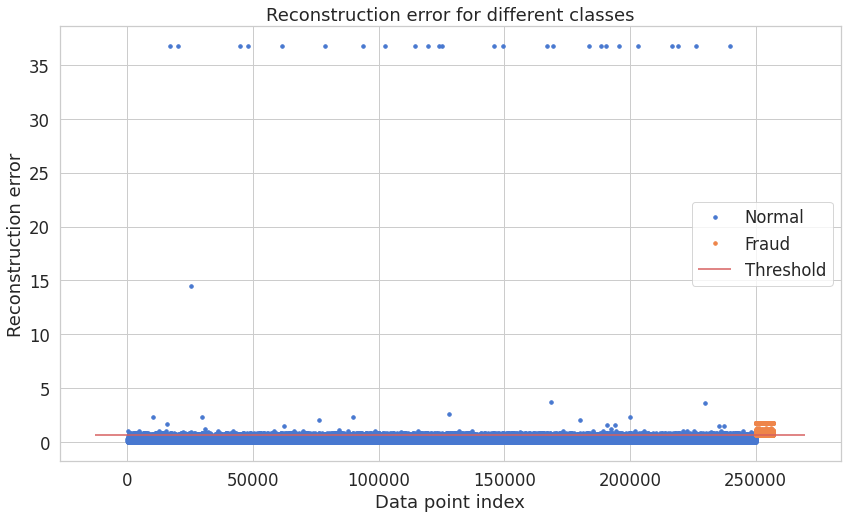

In [ ]:
threshold=0.65
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

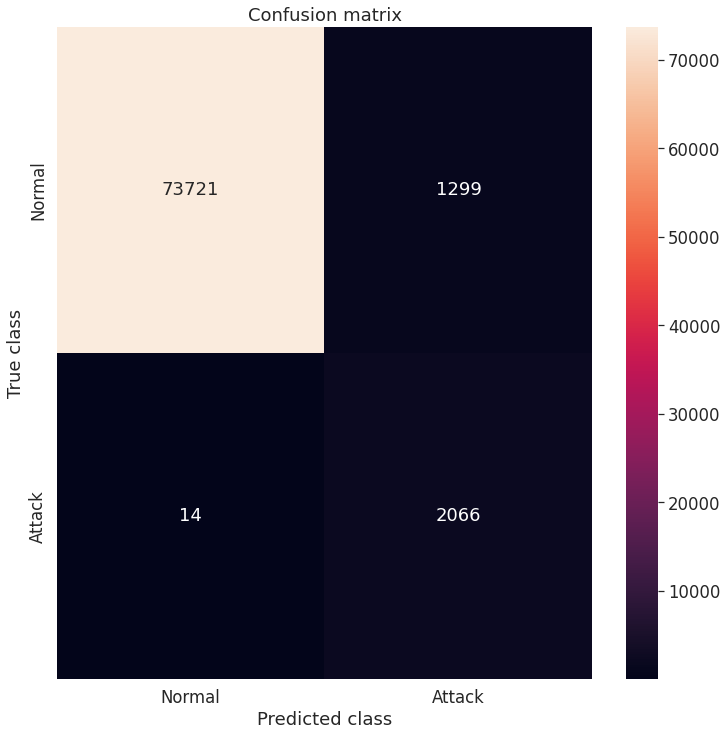

In [ ]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#PCA

In [ ]:
data = df.drop(['index','Unnamed: 0'], axis=1)
data

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3389,6,5206015,9,11,1213,1948,661,0,134.777778,209.079995,1173,0,177.090909,347.937194,607.182269,3.841710,2.740008e+05,4.873823e+05,1906221,54,5206015,650751.9,1.367797e+06,4024698,186,5043065,5.043065e+05,5.916400e+05,1906221,46378,0,0,0,0,192,244,1.728770,2.112941,0,1173,150.523810,282.220768,79648.561905,0,0,1,1,0,0,0,1,158.05000,134.77777,177.09091,0,0,0,0,0,0,9,1213,11,1948,8192,62872,6,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,1
1,443,6,60991608,14,14,1211,3396,875,0,86.500000,235.073066,1460,0,242.571429,520.660485,75.534982,0.459080,2.258948e+06,4.218116e+06,10009249,1,60991608,4691662.0,5.173112e+06,10077768,265,60922977,4.686383e+06,5.195334e+06,10080219,1,0,0,0,0,292,364,0.229540,0.229540,0,1460,158.862069,398.172318,158541.194581,0,0,0,1,0,0,0,0,164.53572,86.50000,242.57143,0,0,0,0,0,0,14,1211,14,3396,8192,117,9,20,1.165047e+05,1.174018e+05,356150,68519,1.000239e+07,1.665183e+04,10009249,9968397,1
2,53,17,27292,1,1,45,163,45,45,45.000000,0.000000,163,163,163.000000,0.000000,7621.280961,73.281548,2.729200e+04,0.000000e+00,27292,27292,0,0.0,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,8,8,36.640774,36.640774,45,163,84.333333,68.127332,4641.333333,0,0,0,0,0,0,0,0,126.50000,45.00000,163.00000,0,0,0,0,0,0,1,45,1,163,-1,-1,0,8,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,1
3,443,6,70343424,17,20,1118,5653,258,0,65.764706,88.989837,1430,0,282.650000,445.753682,96.256332,0.525991,1.953984e+06,9.874980e+06,58654921,8,70343424,4396464.0,1.474216e+07,58790474,142,70195940,3.694523e+06,1.354913e+07,58750691,13,0,0,0,0,352,412,0.241671,0.284319,0,1430,178.184211,343.542661,118021.559744,0,0,0,1,0,0,0,0,183.00000,65.76471,282.65000,0,0,0,0,0,0,17,1118,20,5653,8192,184,9,20,5.276835e+05,3.863115e+05,800847,254520,3.457024e+07,3.406089e+07,58654921,10485549,1
4,53,17,137267,2,2,94,214,47,47,47.000000,0.000000,107,107,107.000000,0.000000,2243.802225,29.140289,4.575567e+04,4.240885e+04,84190,259,137008,137008.0,0.000000e+00,137008,137008,84449,8.444900e+04,0.000000e+00,84449,84449,0,0,0,0,16,16,14.570144,14.570144,47,107,71.000000,32.863353,1080.000000,0,0,0,0,0,0,0,0,88.75000,47.00000,107.00000,0,0,0,0,0,0,2,94,2,214,-1,-1,1,8,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531324,80,6,99999918,2,2,16,0,8,8,8.000000,0.000000,0,0,0.000000,0.000000,0.160000,0.040000,3.333331e+07,5.773497e+07,99999902,2,99999916,99999920.0,0.000000e+00,99999916,99999916,99999904,9.999990e+07,0.000000e+00,99999904,99999904,1,0,0,0,64,64,0.020000,0.020000,0,8,4.800000,4.381780,19.200000,0,1,0,0,1,0,0,0,6.00000,8.00000,0.00000,0,0,0,0,0,0

Text(0, 0.5, 'PC2')

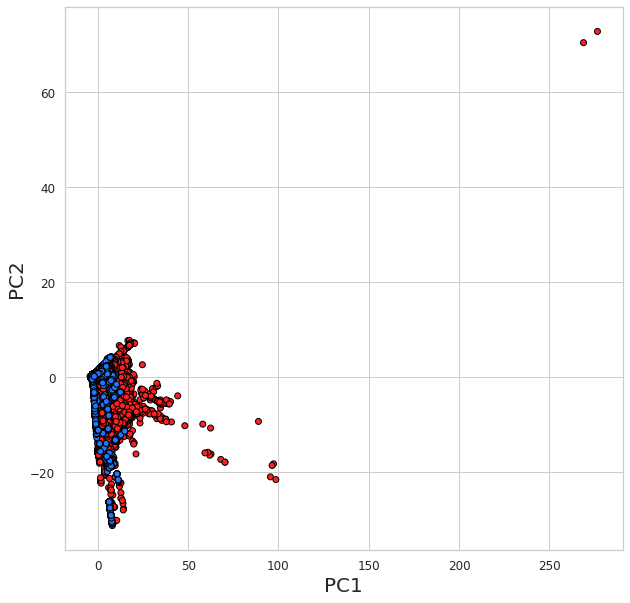

In [ ]:
#imports
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#Scale the data
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)

#Obtain principal components
pca = PCA().fit(scaled)

pc = pca.transform(scaled)
pc1 = pc[:,0]
pc2 = pc[:,1]

#Plot principal components
plt.figure(figsize=(10,10))

colour = ['#ff2121' if y == 0 else '#2176ff' for y in data['Label']]
plt.scatter(pc1,pc2 ,c=colour,edgecolors='#000000')
plt.ylabel("Glucose",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('PC1')
plt.ylabel('PC2')

23.90972524713512


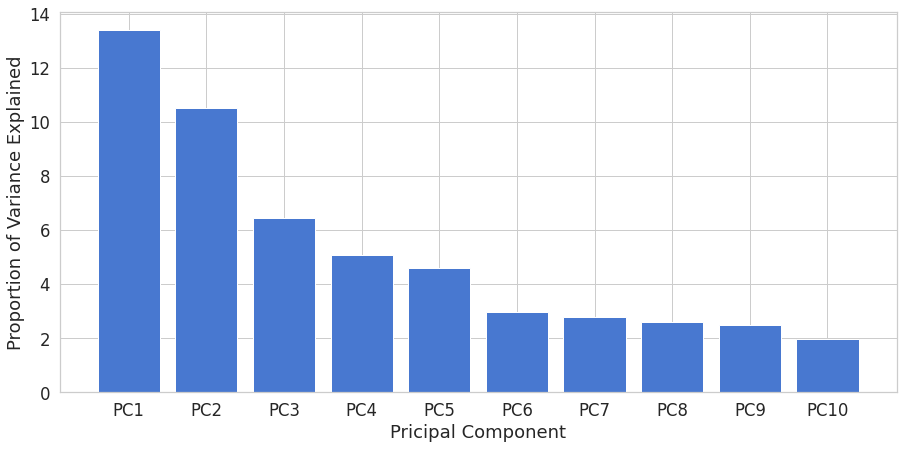

In [ ]:
var = pca.explained_variance_[0:10] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(15,7))
plt.bar(labels,var,)
plt.xlabel('Pricipal Component', fontsize=18)
plt.ylabel('Proportion of Variance Explained', fontsize=18)

print(var[0]+ var[1])

In [ ]:
data=data[['Init Fwd Win Byts','Dst Port','Fwd Seg Size Min','ACK Flag Cnt','Flow Pkts/s','Bwd Pkts/s','Init Bwd Win Byts','Fwd Pkts/s','RST Flag Cnt','PSH Flag Cnt','ECE Flag Cnt','URG Flag Cnt','Bwd Seg Size Avg','Bwd Pkt Len Max','Bwd Pkt Len Std','Fwd IAT Min','Protocol','Pkt Len Max','Fwd Pkt Len Max','Flow Duration','Label']]

Text(0, 0.5, 'PC2')

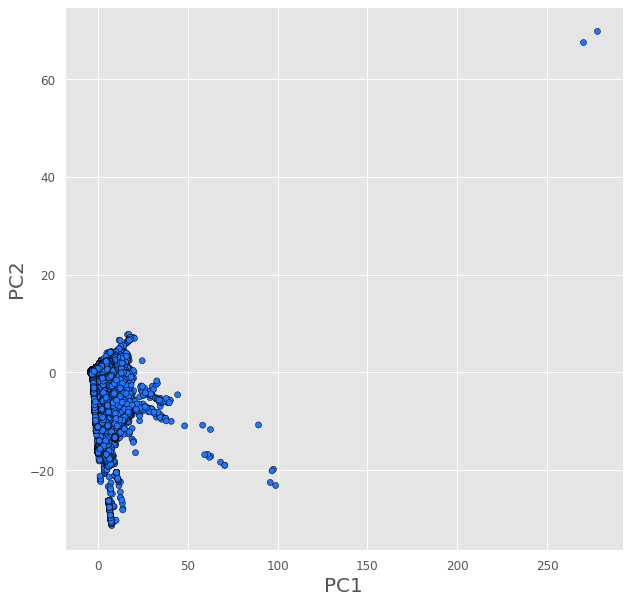

In [ ]:
#imports
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#Scale the data
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)

#Obtain principal components
pca = PCA().fit(scaled)

pc = pca.transform(scaled)
pc1 = pc[:,0]
pc2 = pc[:,1]

#Plot principal components
plt.figure(figsize=(10,10))

colour = ['#ff2121' if y == 0 else '#2176ff' for y in data['Label']]
plt.scatter(pc1,pc2 ,c=colour,edgecolors='#000000')
plt.ylabel("Glucose",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data

X = df.drop(['Label'], axis=1)
y = df['Label']
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

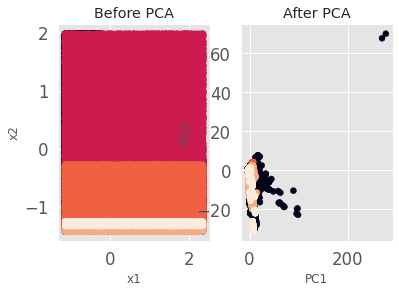

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()